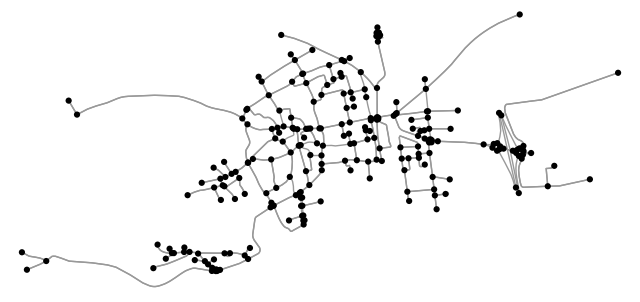

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [54]:
import osmnx as ox

#import the map of tokyo
G = ox.graph_from_place('bischoffsheim, France', network_type='drive')
#plot the map with a white background
ox.plot_graph(G, bgcolor='white', node_size=20, edge_linewidth=1, edge_color='#999999', node_color='#000000')


In [ ]:
# print the edges with all their attributes
for u, v, k, data in G.edges(keys=True, data=True):
    print(u, v, k, data)

In [14]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv("../Sources/map/map_lyon_edge_list.csv", sep=',', header=0)

# chaque csv contient les colonnes node_id1,node_id2,speed,type,length
nodes = pd.concat([df['node_id1'], df['node_id2']]).unique()
number_of_nodes = len(nodes)
number_of_edges = len(df)
neighbourhood_average = 0
neighbourhood_distribution = np.zeros(15)
for node in nodes:
    # on calcule le nombre de voisins de chaque noeud
    filtered_df = df[(df['node_id1'] == node) | (df['node_id2'] == node)]
    neighbourhood = len(pd.concat([filtered_df['node_id1'], filtered_df['node_id2']]).unique())-1
    neighbourhood_average += neighbourhood
    neighbourhood_distribution[neighbourhood] += 1
neighbourhood_average /= number_of_nodes

print("number of nodes : ", number_of_nodes)
print("number of edges : ", number_of_edges)
print("average neighbourhood : ", neighbourhood_average)
print("neighbourhood distribution : ", neighbourhood_distribution)

number of nodes :  29737
number of edges :  61624
average neighbourhood :  2.4184685745031445
neighbourhood distribution :  [0.0000e+00 1.0045e+04 1.5600e+03 1.4044e+04 3.8740e+03 1.7700e+02
 2.5000e+01 6.0000e+00 6.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


In [19]:
#read the csv file
df = pd.read_csv("../Sources/map/results.csv", sep=',', header=0)
df.head()

,L1,L2,L3,L4
0,2.867894,2.867894,2.867894,2.867894
1,27.499990,10.428270,10.272911,9.989389
2,9.000548,9.000548,9.000548,9.000548
3,9.593197,9.593197,9.593197,9.593197
4,9.038201,9.038201,9.038201,9.038201


In [21]:
#moyenne
l1 = df['L1'].mean()
l2 = df['L2'].mean()
l3 = df['L3'].mean()
l4 = df['L4'].mean()

print("L1 : ", l1)
print("L2 : ", l2)
print("L3 : ", l3)
print("L4 : ", l4)

L1 :  16.37040323616969
L2 :  5.574949357094141
L3 :  5.5029395730286055
L4 :  5.500479182909152


In [166]:
df = pd.read_csv("../Sources/map/results_lyon.csv", sep=',', header=0)
df.head()

,L1,L2,L3,L4,Length,Experiment,Perturbation
0,110.958412,110.958412,110.958412,110.958412,27,0,5.0
1,287.612891,167.612891,142.492980,142.492980,29,0,5.0
2,228.564036,177.890772,143.444125,143.444125,22,0,5.0
3,419.985904,134.523090,125.092184,125.092184,22,0,5.0
4,118.392440,118.392440,118.392440,118.392440,22,0,5.0


In [168]:
df.describe()

,L1,L2,L3,L4,Length,Experiment,Perturbation
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,274.396909,157.782170,142.478968,136.814263,25.240000,2.000000,5.0
std,203.395292,60.019926,51.455964,40.378995,4.867237,1.443376,0.0
min,96.035178,92.144879,82.892946,82.892946,20.000000,0.000000,5.0
25%,135.778077,109.853403,108.917659,108.917659,22.000000,1.000000,5.0
50%,211.042679,135.778077,125.092184,125.092184,24.000000,2.000000,5.0
75%,287.612891,177.890772,156.880964,156.880964,27.000000,3.000000,5.0
max,902.640206,321.048353,279.871273,248.188397,38.000000,4.000000,5.0


In [171]:
ratio = 4
print("L1 : ", df['L1'].mean()*ratio//60, "min", df['L1'].mean()*ratio%60, "s")
print("L2 : ", df['L2'].mean()*ratio//60, "min", df['L2'].mean()*ratio%60, "s")
print("L3 : ", df['L3'].mean()*ratio//60, "min", df['L3'].mean()*ratio%60, "s")
print("L4 : ", df['L4'].mean()*ratio//60, "min", df['L4'].mean()*ratio%60, "s")

L1 :  18.0 min 17.587634827322518 s
L2 :  10.0 min 31.12868037569126 s
L3 :  9.0 min 29.915872751800293 s
L4 :  9.0 min 7.257051934201286 s


In [260]:
df = pd.read_csv("../Sources/results3.csv", sep=',', header=0)

pourcentage = df['perturbation'].unique()
S1, S2, S3, S4 = [], [], [], []
for p in pourcentage:
    S1.append(df[df['perturbation'] == p]['L1'].mean())
    S2.append(df[df['perturbation'] == p]['L2'].mean())
    S3.append(df[df['perturbation'] == p]['L3'].mean())
    S4.append(df[df['perturbation'] == p]['L4'].mean())

import matplotlib.pyplot as plt

#augmenter la taille de la figure
plt.figure(figsize=(140, 96), dpi=80)
#epaisseur des courbes
plt.plot(pourcentage, S1, label="S1", linewidth=32)
plt.plot(pourcentage, S2, label="S2", linewidth=32)
plt.plot(pourcentage, S3, label="S3", linewidth=32)
plt.plot(pourcentage, S4, label="S4", linewidth=32)
plt.legend()
#taille titre et axes
plt.legend(fontsize=192)
plt.xlabel("Pourcentage de perturbation\n", fontsize=192)
plt.ylabel("\nTemps de trajet moyen en secondes\n", fontsize=192)
plt.title("\nEvolution du temps de trajet moyen en fonction du pourcentage de perturbation             \n", fontsize=192)
#taille des axes
plt.xticks(fontsize=192)
plt.yticks(fontsize=192)

plt.tick_params(axis='x', which='major', labelsize=192, width=20, length=128)
plt.tick_params(axis='y', which='major', labelsize=192, width=20, length=128)

for spine in plt.gca().spines.values():
    spine.set_linewidth(18)

plt.show()

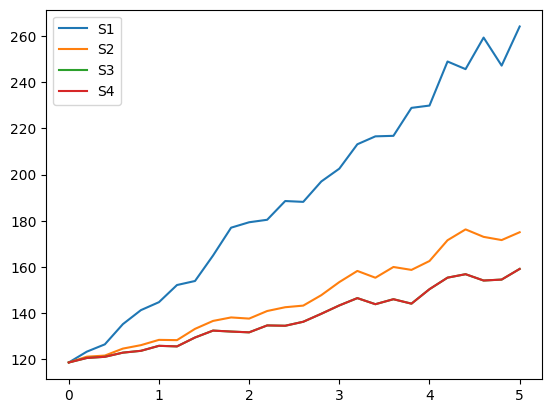

In [200]:
df = pd.read_csv("../Sources/results2.csv", sep=',', header=0)

pourcentage = df['perturbation'].unique()
S1, S2, S3, S4 = [], [], [], []
for p in pourcentage:
    S1.append(df[df['perturbation'] == p]['L1'].mean())
    S2.append(df[df['perturbation'] == p]['L2'].mean())
    S3.append(df[df['perturbation'] == p]['L3'].mean())
    S4.append(df[df['perturbation'] == p]['L4'].mean())

import matplotlib.pyplot as plt
plt.plot(pourcentage, S1, label="S1")
plt.plot(pourcentage, S2, label="S2")
plt.plot(pourcentage, S3, label="S3")
plt.plot(pourcentage, S4, label="S4")
plt.legend()
plt.show()

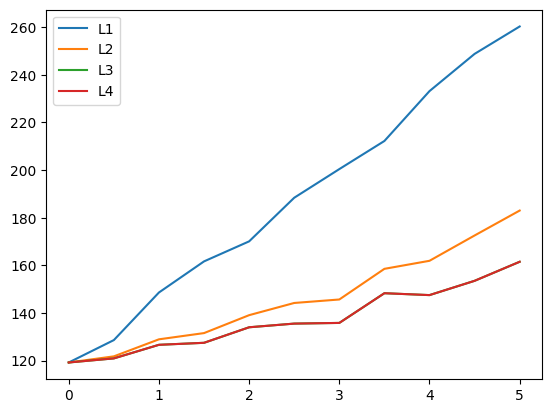

In [67]:
df = pd.read_csv("../Sources/results1.csv", sep=',', header=0)

pourcentage = df['perturbation'].unique()
S1, S2, S3, S4 = [], [], [], []
for p in pourcentage:
    S1.append(df[df['perturbation'] == p]['L1'].mean())
    S2.append(df[df['perturbation'] == p]['L2'].mean())
    S3.append(df[df['perturbation'] == p]['L3'].mean())
    S4.append(df[df['perturbation'] == p]['L4'].mean())

import matplotlib.pyplot as plt
plt.plot(pourcentage, S1, label="S1")
plt.plot(pourcentage, S2, label="S2")
plt.plot(pourcentage, S3, label="S3")
plt.plot(pourcentage, S4, label="S4")
plt.legend()
plt.show()

In [60]:
df.describe()

,L1,L2,L3,L4,len1,len2,len3,len4,experiment,perturbation
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,190.565902,145.791955,137.464409,137.464409,25.397600,27.250538,25.930138,25.930138,24.500000,2.500000
std,107.001402,60.505567,52.532221,52.532221,4.525991,6.144512,5.058542,5.058542,14.430981,1.500012
min,55.306861,55.306861,55.306861,55.306861,20.000000,11.000000,11.000000,11.000000,0.000000,0.000000
25%,109.002928,105.784367,104.114238,104.114238,22.000000,22.000000,22.000000,22.000000,12.000000,1.200000
50%,148.507748,129.702199,124.216460,124.216460,24.000000,26.000000,25.000000,25.000000,24.500000,2.500000
75%,242.629590,166.261138,153.883182,153.883182,28.000000,31.000000,29.000000,29.000000,37.000000,3.800000
max,993.203199,650.856575,603.223557,603.223557,42.000000,77.000000,54.000000,54.000000,49.000000,5.000000


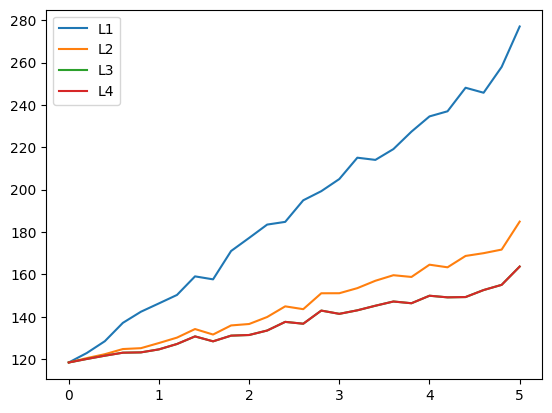

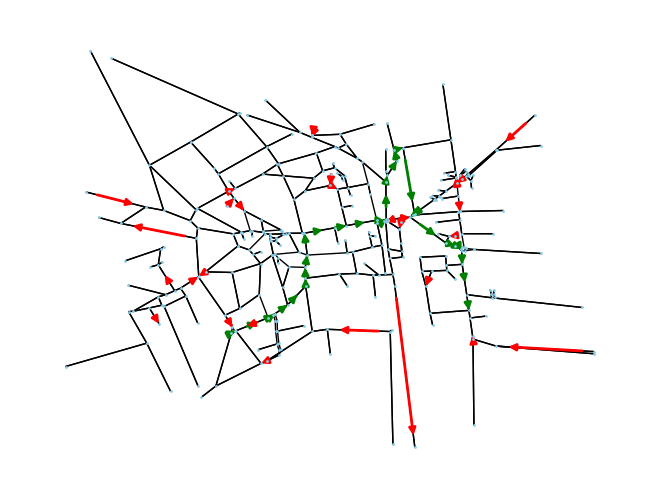

In [58]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import random
from math import radians, cos, sin, asin, sqrt
from itertools import combinations
import time
import numpy as np

weight_of_perturbation = 120
number_of_perturbations = 30
nodes_file_path = '../Sources/map/map_bischoffsheim_node_list.csv'
edges_file_path = '../Sources/map/map_bischoffsheim_edge_list.csv'


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in meters between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def edges_within_distance_from_id(nodes_pos, origin_id, distance, perturbed_edges):
    """
    Returns a list of edges within a given distance from an origin point identified by its ID,
    and that are contained within the perturbed_edges list.

    Parameters:
    - nodes_pos: Dictionary of node positions with node IDs as keys and (longitude, latitude) as values
    - origin_id: ID of the origin point
    - distance: Distance range in kilometers
    - perturbed_edges: List of tuples representing perturbed edges, where each tuple is (node_id1, node_id2)
    """
    if origin_id not in nodes_pos:
        raise ValueError("Origin ID not found in nodes positions.")
    origin_lon, origin_lat = nodes_pos[origin_id]
    within_distance = []
    for node_id, (lon, lat) in nodes_pos.items():
        if haversine(origin_lon, origin_lat, lon, lat) <= distance:
            within_distance.append(node_id)
    # Filter edges based on being within distance and contained in perturbed_edges
    # possible_edges = list(combinations(within_distance, 2))
    # reversed_edges = [(y, x) for x, y in possible_edges]
    # possible_edges = possible_edges + reversed_edges
    filtered_edges = []
    for edge in perturbed_edges:
        u, v = edge
        if u in within_distance and v in within_distance:    
            filtered_edges.append(edge)
    # filtered_edges = [edge for edge in possible_edges if edge in perturbed_edges]
    return filtered_edges

def display_test_graph(graph, nodes_pos, shortest_path, perturbed_edges):
    # Draw the entire graph
    nx.draw(graph, nodes_pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=15)
    # Draw the shortest path in green
    path_edges = [(shortest_path[n], shortest_path[n+1]) for n in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=path_edges, edge_color='green', width=2)
    # Draw the perturbed edges in red
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=perturbed_edges, edge_color='red', width=2)
    # Add edge labels (values)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, nodes_pos, edge_labels=edge_labels)
    plt.show()

def getNodes(nodes_file_path):
    nodes_list = []
    nodes_pos = {}  # Dictionary for node positions
    with open(nodes_file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        counter = 0
        for row in csv_reader:
            if counter == 0:
                counter += 1   
            else:
                node_id = str(row[0])
                longitude = float(row[1])
                latitude = float(row[2])
                nodes_list.append(node_id)
                nodes_pos[node_id] = (longitude, latitude)
    return nodes_list, nodes_pos

def setEdges(city, edges_file_path):
    with open(edges_file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        counter = 0
        for row in csv_reader:
            if counter == 0:
                counter += 1   
            else:
                if row[2] == 'default':
                    row[2] = 50
                city.add_edge(str(row[0]), str(row[1]), weight=float(row[4])/1000/float(row[2])*3600)
    return city   

def add_perturbations(graph, perturbed_edges):
    """Adds a consistent perturbation to the specified edges in the graph in one direction only.
    
    Parameters:
    - graph: A directed graph object from NetworkX.
    - perturbed_edges: A list of tuples representing the edges to be perturbed.
    """
    for edge in perturbed_edges:
        u, v = edge  # Unpack the edge tuple into start (u) and end (v) nodes
        if graph.has_edge(u, v):  # Check if the edge exists in the specified direction
            # graph[u][v]['weight'] += random.randint(1, 5) * weight_of_perturbation
            graph[u][v]['weight'] += weight_of_perturbation
        else:
            print(f"Edge {u} -> {v} not found in graph.")

    return perturbed_edges

def display_graph(graph, nodes_pos, shortest_path, perturbed_edges):
    # Draw the entire graph without labels
    # do not display an arrow on the edges
    nx.draw(graph, nodes_pos, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15, arrows=False)
    # Draw the shortest path in green
    path_edges = [(shortest_path[n], shortest_path[n+1]) for n in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=path_edges, edge_color='green', width=2)
    # Draw the perturbed edges in red
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=perturbed_edges, edge_color='red', width=2)
    plt.show()

def display_info(adjusted_path, total_seconds, source, target, type):
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    travel_time = f"{hours}h {minutes}min and {seconds}s"
    print("==================")
    print("Simulation type: " + type)
    print(f"Lenght of the path: {len(adjusted_path)}")
    print(f"Shortest path from {source} to {target}: {' -> '.join(adjusted_path)}")
    print(f"Travel time : {travel_time}")
    print("==================")

def s1(graph, source, target, perturbed_edges, display=True):
    """Simulation where perturbations are applied to the weights of the edges of the initial shortest path."""
    # Create a copy of the graph
    G_copy = graph.copy()
    # Find the shortest path before perturbations
    adjusted_path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Apply perturbations
    add_perturbations(G_copy, perturbed_edges)
    # Recalculate the length of the initial path with perturbed weights
    perturbed_length = sum(G_copy[u][v]['weight'] for u, v in zip(adjusted_path, adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = perturbed_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S1")
    return adjusted_path, total_seconds

def s2(graph, source, target, perturbed_edges, display=True):
    # Create a copy of the graph
    perturbed_edges_copy = perturbed_edges.copy()
    G_copy = graph.copy()
    G_copy2 = graph.copy()
    # Apply perturbations before finding the path
    add_perturbations(G_copy2, perturbed_edges)
    # Find the shortest path
    path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Iteratively adjust the path if a perturbed edge is encountered
    adjusted_path = []
    current_node = source
    while current_node != target:
        next_node = path[path.index(current_node) + 1]
        adjusted_path.append(current_node)
        # Check if any edge from the current node is perturbed
        perturbed = False
        for next_node in G_copy.neighbors(current_node):
            if (current_node, next_node) in perturbed_edges_copy:
                perturbed = True
                # Add the perturbation on the copy
                G_copy[current_node][next_node]['weight'] = G_copy2[current_node][next_node]['weight']
        if(perturbed):
            # Restart djikstra to obtain the new calculated path
            path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
        current_node = path[path.index(current_node) + 1]
    adjusted_path.append(current_node)
    adjusted_length = sum(G_copy2[u][v]['weight'] for u, v in zip(adjusted_path[:-1], adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = adjusted_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S2")
    return adjusted_path, total_seconds

def s3(graph, nodes_pos, distance, source, target, perturbed_edges, display=True):
    # Create a copy of the graph
    G_copy = graph.copy()
    G_copy2 = graph.copy()
    perturbed_edges_copy = perturbed_edges.copy()
    # Apply perturbations before finding the path
    add_perturbations(G_copy2, perturbed_edges_copy)
    # Iteratively adjust the path if a perturbed edge is encountered
    adjusted_path = [source]
    current_node = source
    path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
    path_state = 0
    while current_node != target:
        # Checking for perturbed edges directly on the path
        modified = False
        for node in G_copy.neighbors(current_node):
            if (current_node, node) in perturbed_edges_copy:
                G_copy[current_node][node]['weight'] = G_copy2[current_node][node]['weight']
                modified = True
        # Checking for perturbed edges near the current node
        nearby_perturbed_edges = edges_within_distance_from_id(nodes_pos, current_node, distance, perturbed_edges_copy)
        for edge in nearby_perturbed_edges:
            u, v = edge
            G_copy[u][v]['weight'] = G_copy2[u][v]['weight']
            modified = True

        if modified:
            path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
            path_state = 1
        else:
            path_state += 1
            
        adjusted_path.append(path[path_state])
        current_node = path[path_state]
    # Calculation and display of travel time
    adjusted_length = sum(G_copy2[u][v]['weight'] for u, v in zip(adjusted_path[:-1], adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = adjusted_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S3")
    return adjusted_path, total_seconds

def s4(graph, source, target, perturbed_edges, display=True):
    G_copy = graph.copy()
    """Simulation where perturbations are applied before finding the shortest path."""
    # Apply perturbations before finding the path
    add_perturbations(G_copy, perturbed_edges)
    # Find the shortest path
    adjusted_path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Display path info with perturbations considered
    perturbed_length = sum(G_copy[u][v]['weight'] for u, v in zip(adjusted_path, adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = perturbed_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S4")
    return adjusted_path, total_seconds

if __name__ == '__main__':
    
    # nodes, nodes_pos = getNodes(nodes_file_path)
    # source = nodes[0]
    # target = nodes[150]
    # # print(nodes_pos[source])
    # # print(nodes_pos[target])
    
    # # Création de la ville
    # city = nx.DiGraph()
    # city.add_nodes_from(nodes)
    # city = setEdges(city, edges_file_path)
    
    # all_edges = city.edges(data=False)
    # edges_list = list(all_edges)
    # perturbed_edges = random.sample(edges_list, k=min(number_of_perturbations, len(edges_list))) 
    
    # path_s1, travel_time_s1 = s1(city, source, target, perturbed_edges)
    # display_graph(city, nodes_pos, path_s1, perturbed_edges)
    
    # path_s2, travel_time_s2 = s2(city, source, target, perturbed_edges)
    # display_graph(city, nodes_pos, path_s2, perturbed_edges)
    
    # path_s3, travel_time_s3 = s3(city, nodes_pos, 200, source, target, perturbed_edges)
    # display_graph(city, nodes_pos, path_s3, perturbed_edges)
    
    # path_s4, travel_time_s4 = s4(city, source, target, perturbed_edges)
    # display_graph(city, nodes_pos, path_s4, perturbed_edges)
    
    nodes, nodes_pos = getNodes(nodes_file_path)
    city = nx.DiGraph()
    city.add_nodes_from(nodes)
    city = setEdges(city, edges_file_path)
    all_edges = city.edges(data=False)
    edges_list = list(all_edges)
    edges_number = len(edges_list)
    perturbed_edges = random.sample(edges_list, k=min(number_of_perturbations, len(edges_list)))
    
    source = random.choice(nodes)
    target = random.choice(nodes)
    while len(nx.dijkstra_path(city, source, target, weight='weight')) < 20:
        source = random.choice(nodes)
        target = random.choice(nodes)
    
    
    path_s3, travel_time_s3 = s3(city, nodes_pos, 100, source, target, perturbed_edges, display=False)
    display_graph(city, nodes_pos, path_s3, perturbed_edges)


In [259]:
import matplotlib.pyplot as plt

# Données
part_globale = [0.338, 0.711, 0.68, 0.459]
part_proche = [0.957, 0.892, 0.925, 0.91]

# Concaténation des données
data = [part_globale, part_proche]

# Création de la boîte à moustache horizontale
fig, ax = plt.subplots(figsize=(157, 90))

# Ajout de la couleur et des marques pour les médianes
bp = ax.boxplot(data, vert=False, widths=0.7, notch=False, medianprops=dict(color='red'), patch_artist=True)

# Ajout de couleurs aux boîtes
colors = ['#000000', '#000000']
for box, color in zip(bp['boxes'], colors):
    box.set(color=color, linewidth=25, alpha=0.7, facecolor='#E89A01')

# augmenter la taille des traits des boîtes
for whisker in bp['whiskers']:
    whisker.set(linewidth=25)
# augmenter la taille des traits des médianes
for median in bp['medians']:
    median.set(linewidth=25)
# augmenter la taille des traits des moustaches
for cap in bp['caps']:
    cap.set(linewidth=25)

# Ajout de titres et d'étiquettes
ax.set_yticklabels(['      Part détectée globale', 'Part détectée proche'], fontsize=300, color='black', rotation=35)
ax.set_xlim(0.3, 1)
# augmenter la taille des axes
plt.xticks(fontsize=250)
# titre abscisse
plt.xlabel(' ', fontsize=300, color='black')

#augmenter la taille des traits des axes
plt.tick_params(axis='x', which='major', labelsize=180, width=16, length=140)
plt.tick_params(axis='y', which='major', labelsize=180, width=16, length=140)

# Ajout de la grille
ax.grid(axis='x', linestyle='--', alpha=0.7, linewidth=14)

for spine in plt.gca().spines.values():
    spine.set_linewidth(20)
    


# Affichage du graphique
plt.title('\nComparaison entre part de voitures détectées globale et proche            \n', fontsize=300, color='black', loc='center')
plt.show()


In [ ]:
part_globale = [0.218, 0.171, 0.35]
part_proche = [0.764, 0.863, 0.833]

# Concaténation des données
data = [part_globale, part_proche]

# Création de la boîte à moustache horizontale
fig, ax = plt.subplots(figsize=(157, 90))

# Ajout de la couleur et des marques pour les médianes
bp = ax.boxplot(data, vert=False, widths=0.7, notch=False, medianprops=dict(color='red'), patch_artist=True)

# Ajout de couleurs aux boîtes
colors = ['#000000', '#000000']
for box, color in zip(bp['boxes'], colors):
    box.set(color=color, linewidth=25, alpha=0.7, facecolor='#E89A01')

# augmenter la taille des traits des boîtes
for whisker in bp['whiskers']:
    whisker.set(linewidth=25)
# augmenter la taille des traits des médianes
for median in bp['medians']:
    median.set(linewidth=25)
# augmenter la taille des traits des moustaches
for cap in bp['caps']:
    cap.set(linewidth=25)

# Ajout de titres et d'étiquettes
ax.set_yticklabels(['      Part détectée globale', 'Part détectée proche'], fontsize=300, color='black', rotation=35)
ax.set_xlim(0.1, 1)  # Limite de l'axe x
# augmenter la taille des axes
plt.xticks(fontsize=250)
# titre abscisse
plt.xlabel(' ', fontsize=300, color='black')


plt.tick_params(axis='x', which='major', labelsize=180, width=16, length=140)
plt.tick_params(axis='y', which='major', labelsize=180, width=16, length=140)

# Ajout de la grille
ax.grid(axis='x', linestyle='--', alpha=0.7, linewidth=14)

for spine in plt.gca().spines.values():
    spine.set_linewidth(20)


# Affichage du graphique
plt.title('\nComparaison entre part de personnes détectées globale et proche         \n', fontsize=300, color='black', loc='center')
plt.show()

In [ ]:

# Taux de certitude globale	0,801	0,455	0,691
taux_certitude_globale = [0.801, 0.455, 0.691]
# Taux de certitude proche	0,806	0,872	0,845
taux_certitude_proche = [0.806, 0.872, 0.845]


# Concaténation des données
data = [taux_certitude_globale, taux_certitude_proche]

# Création de la boîte à moustache horizontale
fig, ax = plt.subplots(figsize=(157, 90))

# Ajout de la couleur et des marques pour les médianes
bp = ax.boxplot(data, vert=False, widths=0.7, notch=False, medianprops=dict(color='red'), patch_artist=True)

# Ajout de couleurs aux boîtes
colors = ['#000000', '#000000']
for box, color in zip(bp['boxes'], colors):
    box.set(color=color, linewidth=25, alpha=0.7, facecolor='#E89A01')

# augmenter la taille des traits des boîtes
for whisker in bp['whiskers']:
    whisker.set(linewidth=25)
# augmenter la taille des traits des médianes
for median in bp['medians']:
    median.set(linewidth=25)
# augmenter la taille des traits des moustaches
for cap in bp['caps']:
    cap.set(linewidth=25)

# Ajout de titres et d'étiquettes
ax.set_yticklabels(['      Taux de certitude globale', 'Taux de certitude proche'], fontsize=300, color='black', rotation=35)
ax.set_xlim(0.3, 1)  # Limite de l'axe x
# augmenter la taille des axes
plt.xticks(fontsize=250)
# titre abscisse
plt.xlabel(' ', fontsize=300, color='black')

#augmenter la taille des traits des axes
plt.tick_params(axis='x', which='major', labelsize=180, width=16, length=140)
plt.tick_params(axis='y', which='major', labelsize=180, width=16, length=140)

# Ajout de la grille
ax.grid(axis='x', linestyle='--', alpha=0.7, linewidth=14)

for spine in plt.gca().spines.values():
    spine.set_linewidth(20)

# Affichage du graphique
plt.title('\nComparaison entre taux de certitude globale et proche pour les piétons        \n', fontsize=300, color='black', loc='center')
plt.show()


In [ ]:
taux_certitude_globale = [0.722, 0.748, 0.73, 0.749]
taux_certitude_proche = [0.829, 0.837, 0.838, 0.812]

# Concaténation des données
data = [taux_certitude_globale, taux_certitude_proche]

# Création de la boîte à moustache horizontale
fig, ax = plt.subplots(figsize=(157, 90))

# Ajout de la couleur et des marques pour les médianes
bp = ax.boxplot(data, vert=False, widths=0.7, notch=False, medianprops=dict(color='red'), patch_artist=True)

# Ajout de couleurs aux boîtes
colors = ['#000000', '#000000']
for box, color in zip(bp['boxes'], colors):
    box.set(color=color, linewidth=25, alpha=0.7, facecolor='#E89A01')

# augmenter la taille des traits des boîtes
for whisker in bp['whiskers']:
    whisker.set(linewidth=25)
# augmenter la taille des traits des médianes
for median in bp['medians']:
    median.set(linewidth=25)
# augmenter la taille des traits des moustaches
for cap in bp['caps']:
    cap.set(linewidth=25)

# Ajout de titres et d'étiquettes
ax.set_yticklabels(['      Taux de certitude globale', 'Taux de certitude proche'], fontsize=300, color='black', rotation=35)
ax.set_xlim(0.5, 1)  # Limite de l'axe x
# augmenter la taille des axes
plt.xticks(fontsize=250)
# titre abscisse
plt.xlabel(' ', fontsize=300, color='black')

#augmenter la taille des traits des axes
plt.tick_params(axis='x', which='major', labelsize=180, width=16, length=140)
plt.tick_params(axis='y', which='major', labelsize=180, width=16, length=140)


# Ajout de la grille
ax.grid(axis='x', linestyle='--', alpha=0.7, linewidth=14)

for spine in plt.gca().spines.values():
    spine.set_linewidth(20)

# Affichage du graphique
plt.title('\nComparaison entre taux de certitude globale et proche pour les voitures       \n', fontsize=300, color='black', loc='center')
plt.show()